In [18]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement Random Forest Classifier
import sklearn
from sklearn.ensemble import RandomForestClassifier
 
# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Import packages to implement Stratified K-fold CV
from sklearn.model_selection import StratifiedKFold,KFold # For creating folds

# Import Package to implement GridSearch CV (Hyperparameter Tuning Method 1)
from sklearn.model_selection import GridSearchCV

# Importing package for Randomized Search CV (Hyperparameter Tuning Method 2)
from sklearn.model_selection import RandomizedSearchCV

# Package to record time
import time

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Module to save and load Python objects to and from files
import pickle

In [49]:
health_df = pd.read_csv('fetal_health.csv')
health_df['fetal_health'] = health_df['fetal_health'].replace({1.0: 'Normal', 2.0: 'Suspect', 3.0: 'Pathological'})
health_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,Suspect
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal


In [51]:
X = health_df.drop(columns = ['fetal_health'])
y = health_df['fetal_health']

y, uniques = pd.factorize(y) 

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [52]:
# Define your model
rf = RandomForestClassifier(random_state = 2)

# Ranges for hyperparameters
hyper_params = {
    'max_depth': list(range(2, 40)),
    'min_samples_leaf': list(range(2, 40)),
    'min_samples_split': list(range(2, 40))
}

# Creating folds
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 3)

# Create the random search CV
random_model_cv = RandomizedSearchCV(estimator = rf,
                                     param_distributions = hyper_params,
                                     scoring = 'f1_weighted',
                                     cv = folds,
                                     verbose = 1,
                                     n_jobs = -1,
                                     n_iter = 50,
                                     random_state = 4)


# Fit the model
start = time.time()            # Start Time
random_model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Training time: 54.46598029136658s


In [53]:
# Return set of parameters with the best performance
print(random_model_cv.best_params_)

# Return the performance metric score
print(random_model_cv.best_score_)

{'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 12}
0.9382396440709677


In [57]:
hyper_params_new = {
    'max_depth': list(range(4, 11)),
    'min_samples_leaf': list(range(2, 6)),
    'min_samples_split': list(range(10, 15))
}

In [58]:
model_cv = GridSearchCV(estimator = rf,
                        param_grid = hyper_params_new,
                        scoring = 'f1_weighted',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1)
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 10 folds for each of 140 candidates, totalling 1400 fits
Training time: 126.25721311569214s


In [60]:
# Return set of parameters with the best performance
print(model_cv.best_params_)

# Return the performance metric score
print(model_cv.best_score_)

{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.9328457530352695


In [61]:
hyper_params_new = {
    'max_depth': list(range(8, 10)),
    'min_samples_leaf': list(range(2, 3)),
    'min_samples_split': list(range(6, 12))
}

In [62]:
model_cv = GridSearchCV(estimator = rf,
                        param_grid = hyper_params_new,
                        scoring = 'f1_weighted',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1)
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 10 folds for each of 12 candidates, totalling 120 fits


Training time: 13.453557252883911s


In [63]:
# Return set of parameters with the best performance
print(model_cv.best_params_)

# Return the performance metric score
print(model_cv.best_score_)

{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 7}
0.9330485337507174


In [64]:
bestClassTree = model_cv.best_estimator_
print(bestClassTree)

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=7,
                       random_state=2)


In [70]:
# predictions on test set
y_pred = model_cv.predict(test_X)

score = model_cv.score(train_X, train_y)
print('R-squared:', score)

R-squared: 0.9734818380573392


In [66]:
# Storing importance values from the best fit model
importance = bestClassTree.feature_importances_

# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

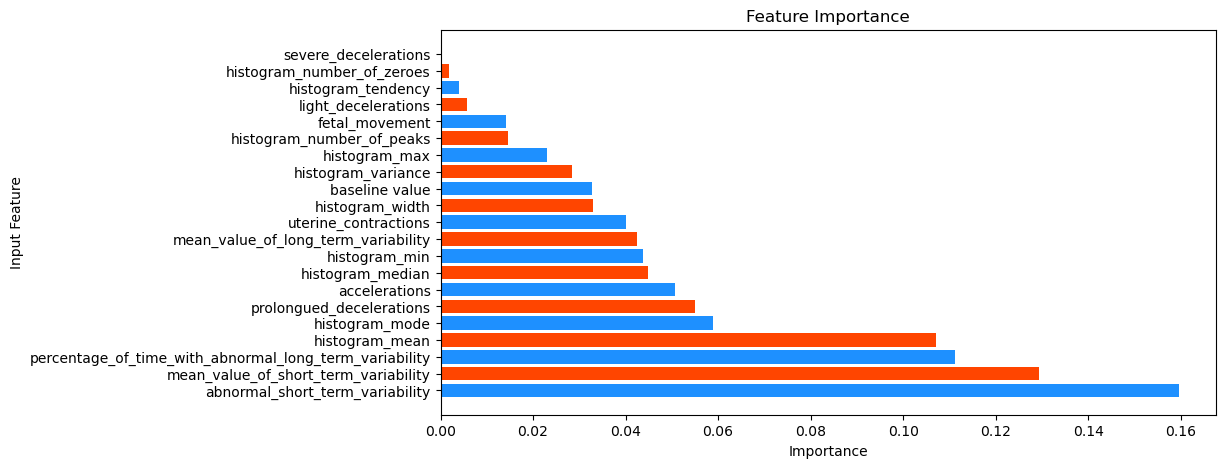

In [67]:
# Selecting features with non-zero importance values
feature_imp_nonzero = feature_imp[feature_imp['Importance'] != 0.0]

# Bar plot
plt.figure(figsize=(10, 5), dpi = 100)
plt.barh(feature_imp_nonzero['Feature'], feature_imp_nonzero['Importance'], color = ['dodgerblue', 'orangered']);

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title("Feature Importance")
plt.savefig('importance.svg')

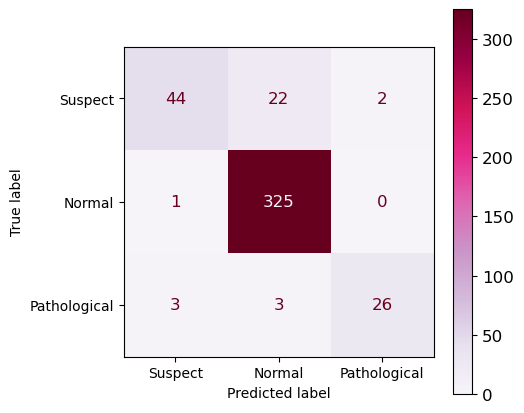

In [71]:
# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = uniques)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax)
fig.savefig('cf_mat.svg')

In [72]:
# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df.to_csv('class_report.csv') 

In [74]:
# First pickle file: saving the trained DT model
# Creating the file where we want to write the model
rf_pickle = open('health.pickle', 'wb') 

# Write model to the file
pickle.dump(model_cv, rf_pickle) 

# Close the file
rf_pickle.close() 

# Second pickle file: uniques variable, which maps the 
# factorized output variable to the species name that we recognize
output_pickle = open('output_health.pickle', 'wb') 
pickle.dump(uniques, output_pickle) 
output_pickle.close() 